# Problem Set 2, due January 23th at 5:30 pm/January 24th 3:30pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [92]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import statsmodels.formula.api as smf


In [81]:
prgsa_df = pd.read_csv('progresa_sample.csv')

In [82]:
prgsa_df.head(4)

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0


In [83]:
# Mean of all variables except year,folnum and village
mean_df = pd.DataFrame(prgsa_df.mean().sort_index(ascending=True))

# Give column Name
mean_df.rename(columns = {0:'Mean'},inplace=True)

# Obtain standard deviationo
mean_df['Standard Deviation'] = pd.DataFrame(prgsa_df.std().sort_index(ascending=True))

#Remove columns year, folnum and village
mean_df = mean_df.drop(['year','folnum','village'],axis=0)

#Transpose the dataframe
mean_df = mean_df.transpose()

# Show dataframe
print(mean_df)





                          age    dist_cap  dist_sec     fam_n       grc  \
Mean                11.366460  147.674452  2.418910  7.215715  3.963537   
Standard Deviation   3.167744   76.063134  2.234109  2.352900  2.499063   

                       grc97     hohage    hohedu    hohsex      hohwag  \
Mean                3.705372  44.436717  2.768104  0.925185  586.985312   
Standard Deviation  2.572387  11.620372  2.656106  0.263095  788.133664   

                       indig    min_dist        sc      sc97       sex  \
Mean                0.298324  103.447520  0.819818  0.813922  0.512211   
Standard Deviation  0.457525   42.089441  0.384342  0.389172  0.499854   

                    welfare_index  
Mean                   690.346564  
Standard Deviation     139.491130  


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [102]:
#Obtain the poor househould from 1997
prgsa_poor = prgsa_df[(prgsa_df['poor'] == 'pobre') & (prgsa_df['year'] == 97)]

# SPlit control and treatment groups
pt_97 = prgsa_poor[prgsa_poor['progresa'] != 'basal'].drop(['progresa','poor','year','folnum','village'], axis = 1)
pc_97 = prgsa_poor[prgsa_poor['progresa'] == 'basal'].drop(['progresa','poor','year','folnum','village'], axis = 1)

#OBtaine the mean
pt_97_mean = pt_97.mean().sort_index(ascending=True)
pc_97_mean = pc_97.mean().sort_index(ascending=True)
p_97_diff = pt_97_mean - pc_97_mean

# Add all the the data into a dataframe
p97 = pd.DataFrame(pd.concat([pt_97_mean,pc_97_mean,p_97_diff],axis=1, join='inner'))
p97.column= ['Treatement Mean','Control Mean','Treatment - Control (Mean)']

p97['T_stat']=""
p97['P_stat']=""

#COmpute T and P statistic
for index in range(len(p97)):  
    ttest = scipy.stats.ttest_ind(pt_97.iloc[::,index:index+1].dropna(), pc_97.iloc[::,index:index+1].dropna())
    p97.iloc[index,3:4] = ttest[0]
    p97.iloc[index,4:5] = ttest[1]
    
p97.T_stat = p97.T_stat.str[0]
p97.P_stat = p97.P_stat.str[0]

p97



,0,1,2,T_stat,P_stat
age,10.742023,10.716991,0.025032,-2.506686,1.219172e-02
dist_cap,153.769730,150.829074,2.940656,1.161714,2.453603e-01
dist_sec,2.507662,2.453122,0.054540,2.100433,3.569843e-02
fam_n,7.302469,7.281327,0.021142,-1.668745,9.517806e-02
grc,3.543050,3.531599,0.011450,0.400196,6.890151e-01
grc97,3.543050,3.531599,0.011450,0.794167,4.271039e-01
hohage,44.276918,43.648828,0.628090,-8.206584,2.358312e-16
hohedu,2.590348,2.663139,-0.072791,3.339081,8.415005e-04
hohsex,0.922947,0.924656,-0.001709,-2.541229,1.105093e-02
hohwag,573.163558,544.339544,28.824015,3.594588,3.253835e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

Answer A: 
All records with p value <0.05 will be statiscally significant. We have computed the mean difference as well as computed p and t statistics. The statistical differences for the treatment andd control groups are the following variables.

dist_cap
dist_sec
min_dist
hoh_age
hoh_edu
hoh_wag
sex
welfare_index

Answer B: The presumtion is that the groups of people for the expirment is to be random. If we find significant differences at the baseline, it is an indicator of induced bias and it would lack that the expirement is not random.

Answer C: This implies that the impact of treatment cannot be measured in one way becasue the differences at the baseline would indicate the roleplay of other demographics.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

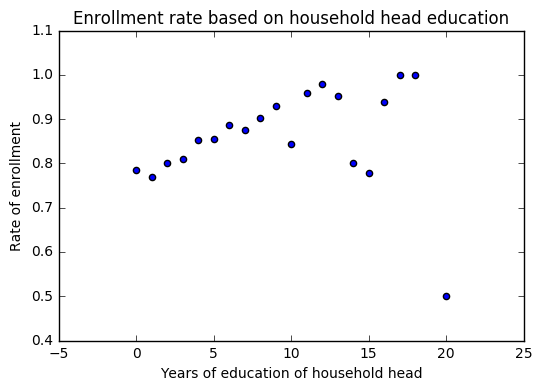

In [105]:
# Computing average enrollment rate for each level of  household head education
headEdu_97 = prgsa_df[prgsa_df.poor == 'pobre'].groupby(['hohedu']).mean()
headEdu_97.reset_index(level=0, inplace=True)

#Plot a scatter plot 
plt.scatter(headEdu_97['hohedu'], headEdu_97['sc97'])
plt.xlabel('Years of education of household head')
plt.ylabel('Rate of enrollment')
plt.title('Enrollment rate based on household head education')


From the graph we can see that as the number of years of education of head of household increasees, the enrollment rate for the child increases. Greater the number of years of education, more positive is the enrollement rate. However there is one outlier where 20 years of education significantly drops the enrollment rate.

NameError: name 'p98' is not defined

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

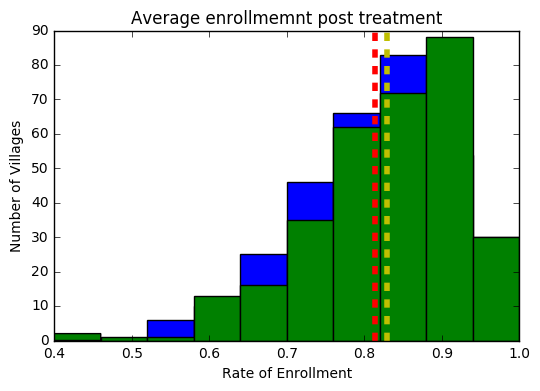

In [122]:
#Let us consider all the house holdds for the years 1997 and 1998 in the program.

p_97 =  prgsa_df[(prgsa_df.poor == 'pobre') & (prgsa_df.progresa == 'basal') & (prgsa_df.year == 97)].groupby('village').mean()
p_98 = prgsa_df[(prgsa_df.poor == 'pobre') & (prgsa_df.progresa == 'basal') & (prgsa_df.year == 98)].groupby('village').mean()

#Calculate mean enrollment before and after
p_97_mean = p_97['sc'].mean()*100
p_98_mean = p_98['sc'].mean()*100
difference_in_mean = p_98_mean - p_97_mean

#Plot histogram for pretreatment
plt.hist(p_97['sc'].values, color = 'b', range = [0.4,1])
plt.axvline(p_97['sc'].mean(), linestyle = 'dashed', color= 'r',linewidth = 4)
plt.xlabel('Rate of Enrollment')
plt.ylabel('Number of Villages')
plt.title('Average enrollmemnt pre treatment')

#Plot histogram for post treatment
plt.hist(p_98['sc'].values, color='g', range = [0.4,1])
plt.axvline(p_98['sc'].mean(), linestyle = 'dashed', color= 'y',linewidth = 4)
plt.xlabel('Rate of Enrollment')
plt.ylabel('Number of Villages')
plt.title('Average enrollmemnt post treatment')



INTERPRETATION: From the overlap of histograms above blue is the pre-treatment wiht red dashed line as mean and green histogram is the post treatment with yellow as the mean. We can see that there is a noticible but not a significant cange in the rare of enrollment after the treatment.

To find if this difference is statiscally siginficant we will do a t test


In [125]:
T_test = scipy.stats.ttest_ind(p_98['sc'].dropna(), p_97['sc'].dropna())
T_test

Ttest_indResult(statistic=2.0157134865156379, pvalue=0.04424870036572115)

From the t-test we can see that the p-value is less than 0.05. Hence we can concluded that event if the difference in pre and post treatment looks non-significant graphically, it is statistically significant as seen in the t-test.

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [138]:
# Obtain control and treatment groups
control =   prgsa_df[(prgsa_df.year == 98) & (prgsa_df.poor == 'pobre') & (prgsa_df.progresa == '0')]
treat = prgsa_df[(prgsa_df.year == 98) & (prgsa_df.poor == 'pobre') & (prgsa_df.progresa == 'basal')]

# Calculate mean
treat_mean = treat['sc'].mean()
control_mean = control['sc'].mean()
mean_diff =  treat_mean-control_mean

#T-test
T_test = scipy.stats.ttest_ind(treat['sc'].dropna(),control['sc'].dropna())

#Add all in a dataframe
pd.DataFrame.from_items([('Control Mean', [control_mean]), 
                         ('Treatment Mean', [treat_mean]), 
                         ('Difference', [treat_mean - control_mean]),
                         ('T Value', [T_test[0]]), ('P Value', [T_test[1]])])



,Control Mean,Treatment Mean,Difference,T Value,P Value
0,0.807637,0.846479,0.038842,8.358721,6.636344e-17


INTERPRETATION: After computing the difference between the treatment and control group we get a p value which is less than 0.05. This is an indication that the difference in enrollment post the treatment is statiscally significant.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [139]:
# Considering only the poor from 1998
pt_df = prgsa_df[(prgsa_df.year == 98) & (prgsa_df.poor == 'pobre')]

# Fitting linear model
model = smf.ols(formula = 'sc ~ progresa', data = pt_df).fit()

# post_treat_model.pvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           6.64e-17
Time:                        14:42:18   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000         0.800     0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
model.bse

Intercept            0.003660
progresa[T.basal]    0.004647
dtype: float64

ANSWER 

2.2.1: The coeffecient of progressa is 0.038, Hence we can say that the program increased enrollment 0.038 times.

2.2.2: The regression estimate and the estimate from the t-statistic done earlier are almost the same.

2.2.3: Since the p-value obtained in more that 0.05, it is an indicator that more than 95% of cases have an positive influece of the program thereby increasing the enrollment rate. We can therefore reject the null hypothesis.

2.2.4: The conterfacutal assumption is, if the treatment through the program did not take place then the rare of enrollment would be the same as control group.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [140]:
# Poor from 1998
p_98 = prgsa_df[(prgsa_df.year == 98) & (prgsa_df.poor == 'pobre')]

# Fitting multiple regression model
p98_multireg = smf.ols(formula =
 'sc ~ progresa + dist_sec + hohedu + welfare_index + indig + dist_cap + min_dist', data = p_98).fit()

p98_multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     107.5
Date:                Thu, 26 Jan 2017   Prob (F-statistic):          4.31e-156
Time:                        14:52:14   Log-Likelihood:                -11509.
No. Observations:               27276   AIC:                         2.303e+04
Df Residuals:                   27268   BIC:                         2.310e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8094      0.015     53.920      0.000         0.780     0.839
progresa[T.basal]     0.0353      0.005      7.631      0.000         0.026     0.044
dist_sec             -0.0093      0.001     -9.104      0.000        -0.011    -0.007
hohedu                0.0156      0.001     17.434      0.000         0.014     0.017
welfare_index        -0.0001   1.98e-05     -7.050      0.000        -0.000    -0.000
indig                 0.0184      0.005      3.369      0.001         0.008     0.029
dist_cap              0.0002   4.27e-05      3.898      0.000      8.27e-05     0.000
min_dist              0.0004   7.32e-05      5.236      0.000         0.000     0.001
==============================================================================
Omnibus:                     7212.133   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14407.407
Skew:                          -1.699   Prob(JB):                         0.00
Kurtosis:                       4.066   Cond. No.                     4.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
#Standard error
p98_multireg.bse

Intercept            0.015011
progresa[T.basal]    0.004626
dist_sec             0.001020
hohedu               0.000898
welfare_index        0.000020
indig                0.005452
dist_cap             0.000043
min_dist             0.000073
dtype: float64

ANSWER: 

2.3.1: How do the controls affect the point estimate of treatment effect?
The addition of the controls decrease the estimate which signify and indicate the influence of these contols on the treatement when estimating with all the controls.

2.3.2: How do the controls affect the standard error on the treatment effect? 
the standard error has reduced from 004647 to 004626.

2.3.3: How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
The R-squared is different in 2.2 and in 2.3. 0.026- 0.003. This indicates that there is sigificant impact by adding additional controls on the assessment.


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [151]:
# calculating average pre-values for control and treatment
pre_control =   prgsa_df[(prgsa_df.poor == 'pobre') & (prgsa_df.year == 97) & (prgsa_df.progresa == 'basal')].mean()['sc']
pre_treatment =  prgsa_df[(prgsa_df.poor == 'pobre') & (prgsa_df.year == 97) & (prgsa_df.progresa == '0')].mean()['sc']

# calculating average post-values for control and treatment
post_control =   prgsa_df[(prgsa_df.poor == 'pobre') & (prgsa_df.year == 98) & (prgsa_df.progresa == 'basal')].mean()['sc']
post_treatment = prgsa_df[(prgsa_df.poor == 'pobre') & (prgsa_df.year == 98) & (prgsa_df.progresa == '0')].mean()['sc']

# calculating the difference (between 1997 and 1998) in enrollment rates among poor households in control villages
diff_control =   post_control - pre_control

# calculating the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages
diff_treatment = post_treatment - pre_treatment

# calculating the difference between the above 2, that is difference-in-difference
diff_in_diff =    diff_treatment - diff_control

# tabulating the results
table1 = {'Treatment':pd.Series([pre_control, post_control, diff_control], index = ['97', '98', 'Difference']),
       'Control':pd.Series([pre_treatment, post_treatment, diff_treatment], index = ['97', '98', 'Difference']),}
pd.DataFrame(table1)



,Control,Treatment
97,0.815186,0.822697
98,0.807637,0.846479
Difference,-0.007549,0.023782


In [152]:
diff_in_diff

-0.031331280319323085

The difference in difference estimate is 0.031331280319323085.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

Overall we seen consistent impact of the treatement. The impact reduced slightly with parameter estimate.
We also computed the double difference for treament and control group from 97 to 98 which indicating that the effect of progress did not have a statisticall impact  on the enrollment rate.
But over all it can be concluded that progress did have an impact on enrollemnt rates excluding the impact of other variables and that the the impact was highly correlational.